In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn 

In [415]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import seaborn as sns
print("Setup Complete")

Setup Complete


In [528]:
import os
if not os.path.exists("./pokedex.csv"):
    os.symlink("./pokedex.csv", "./pokedex.csv") 
print("Setup Complete")

FileExistsError: [Errno 17] File exists: './pokedex.csv' -> './pokedex.csv'

In [516]:
import warnings
warnings.filterwarnings('ignore')

In [462]:
file_path = '/Users/joserodriguez/Downloads/archive/pokedex.csv'

pokedex_data = pd.read_csv('/Users/joserodriguez/Downloads/archive/pokedex.csv')

In [464]:
pokedex_data.head()

,Image,Index,Name,Type 1,Type 2,Total,HP,Attack,Defense,SP. Atk.,SP. Def,Speed
0,images/1.png,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45
1,images/2.png,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60
2,images/3.png,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80
3,images/4.png,3,Venusaur Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80
4,images/5.png,4,Charmander,Fire,NaN,309,39,52,43,60,50,65


In [500]:
list(pokedex_data.columns)

['Image',
 'Index',
 'Name',
 'Type 1',
 'Type 2',
 'Total',
 'HP',
 'Attack',
 'Defense',
 'SP. Atk.',
 'SP. Def',
 'Speed']

In [498]:
pokedex_data.columns = pokedex_data.columns.str.strip()

In [468]:
pokedex_data.describe()

,Index,Total,HP,Attack,Defense,SP. Atk.,SP. Def,Speed
count,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000
mean,501.735802,443.104527,71.244444,81.152263,75.007407,73.224691,72.441152,70.034568
std,298.979081,121.193406,26.927819,32.037134,30.740999,32.757152,27.578188,30.161298
min,1.000000,175.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,240.500000,332.000000,52.000000,57.000000,52.000000,50.000000,51.000000,45.000000
50%,495.000000,465.000000,70.000000,80.000000,70.000000,65.000000,70.000000,68.000000
75%,753.500000,521.000000,85.000000,100.000000,91.000000,95.000000,90.000000,91.000000
max,1025.000000,1125.000000,255.000000,190.000000,250.000000,194.000000,250.000000,200.000000


In [433]:
pokedex_data['Type 2'] = pokedex_data['Type 2'].fillna('')

pokemon = pokedex_data.drop(['#', 'Total', 'Legendary'], axis=1, errors='ignore')

print(pokemon.head(2))

          Image  Index       Name Type 1  Type 2  HP  Attack  Defense  \
0  images/1.png      1  Bulbasaur  Grass  Poison  45      49       49   
1  images/2.png      2    Ivysaur  Grass  Poison  60      62       63   

   SP. Atk.  SP. Def  Speed  
0        65       65     45  
1        80       80     60  


In [435]:
pokedex_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215 entries, 0 to 1214
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Image     1215 non-null   object
 1   Index     1215 non-null   int64 
 2   Name      1215 non-null   object
 3   Type 1    1215 non-null   object
 4   Type 2    1215 non-null   object
 5   Total     1215 non-null   int64 
 6   HP        1215 non-null   int64 
 7   Attack    1215 non-null   int64 
 8   Defense   1215 non-null   int64 
 9   SP. Atk.  1215 non-null   int64 
 10  SP. Def   1215 non-null   int64 
 11  Speed     1215 non-null   int64 
dtypes: int64(8), object(4)
memory usage: 114.0+ KB


In [437]:
mean_attack = pokemon.Attack.mean()
mean_defense = pokemon.Defense.mean()
mean_HP = pokemon.HP.mean()
mean_speed = pokemon.Speed.mean()
median_attack = pokemon.Attack.median()
median_defense = pokemon.Defense.median()
median_HP = pokemon.HP.median()
median_speed = pokemon.Speed.median()

In [439]:
print(f"Mean Attack: {mean_attack:.2f}")
print(f"Mean Defense: {mean_defense:.2f}")
print(f"Mean HP: {mean_HP:.2f}")
print(f"Mean Speed: {mean_speed:.2f}")
print(f"Median Attack: {median_attack:.2f}")
print(f"Median Defense: {median_defense:.2f}")
print(f"Median HP: {median_HP:.2f}")
print(f"Median Speed: {median_speed:.2f}")

Mean Attack: 81.15
Mean Defense: 75.01
Mean HP: 71.24
Mean Speed: 70.03
Median Attack: 80.00
Median Defense: 70.00
Median HP: 70.00
Median Speed: 68.00


In [440]:
std_attack = pokemon.Attack.std()
std_defense = pokemon.Defense.std()
std_HP = pokemon.HP.std()
std_speed = pokemon.Speed.std()

In [443]:
print(f"Standard Deviation Attack: {std_attack:.2f}")
print(f"Standard Deviation Defense: {std_defense:.2f}")
print(f"Standard Deviation HP: {std_HP:.2f}")
print(f"Standard Deviation Speed: {std_speed:.2f}")

Standard Deviation Attack: 32.04
Standard Deviation Defense: 30.74
Standard Deviation HP: 26.93
Standard Deviation Speed: 30.16


In [444]:
mean_stats = pokemon.groupby(['Type 1'])[['Attack', 'Defense', 'Speed']].mean()
print(mean_stats)

              Attack     Defense      Speed
Type 1                                     
Bug        70.912088   71.208791  61.857143
Dark       85.482143   70.982143  77.535714
Dragon    103.816327   80.816327  84.653061
Electric   73.148649   65.837838  87.500000
Fairy      71.064516   73.645161  67.064516
Fighting  104.960000   76.440000  76.120000
Fire       84.473684   69.315789  73.960526
Flying     81.900000   67.400000  86.800000
Ghost      72.000000   78.042553  63.297872
Grass      77.743363   72.318584  62.433628
Ground     94.085106   86.808511  63.808511
Ice        80.046512   75.279070  67.604651
Normal     76.820896   62.059701  70.805970
Poison     77.000000   77.020408  67.265306
Psychic    75.646341   71.524390  80.365854
Rock       90.676471   97.352941  58.411765
Steel      92.511111  114.266667  57.555556
Water      76.920000   72.840000  68.346667


In [538]:
from collections import Counter
type_counts = Counter()
for types in pokedex_data[['Type 1', 'Type 2']].values:
    for t in types:
        if pd.notna(t): 
            type_counts[t.strip()] += 1
print(type_counts)

Counter({'Water': 176, 'Normal': 153, 'Grass': 146, 'Psychic': 134, 'Flying': 132, 'Bug': 100, 'Fire': 97, 'Poison': 96, 'Dragon': 93, 'Fighting': 92, 'Ground': 90, 'Dark': 89, 'Rock': 88, 'Electric': 87, 'Ghost': 87, 'Steel': 85, 'Fairy': 74, 'Ice': 65})


<function matplotlib.pyplot.show(close=None, block=None)>

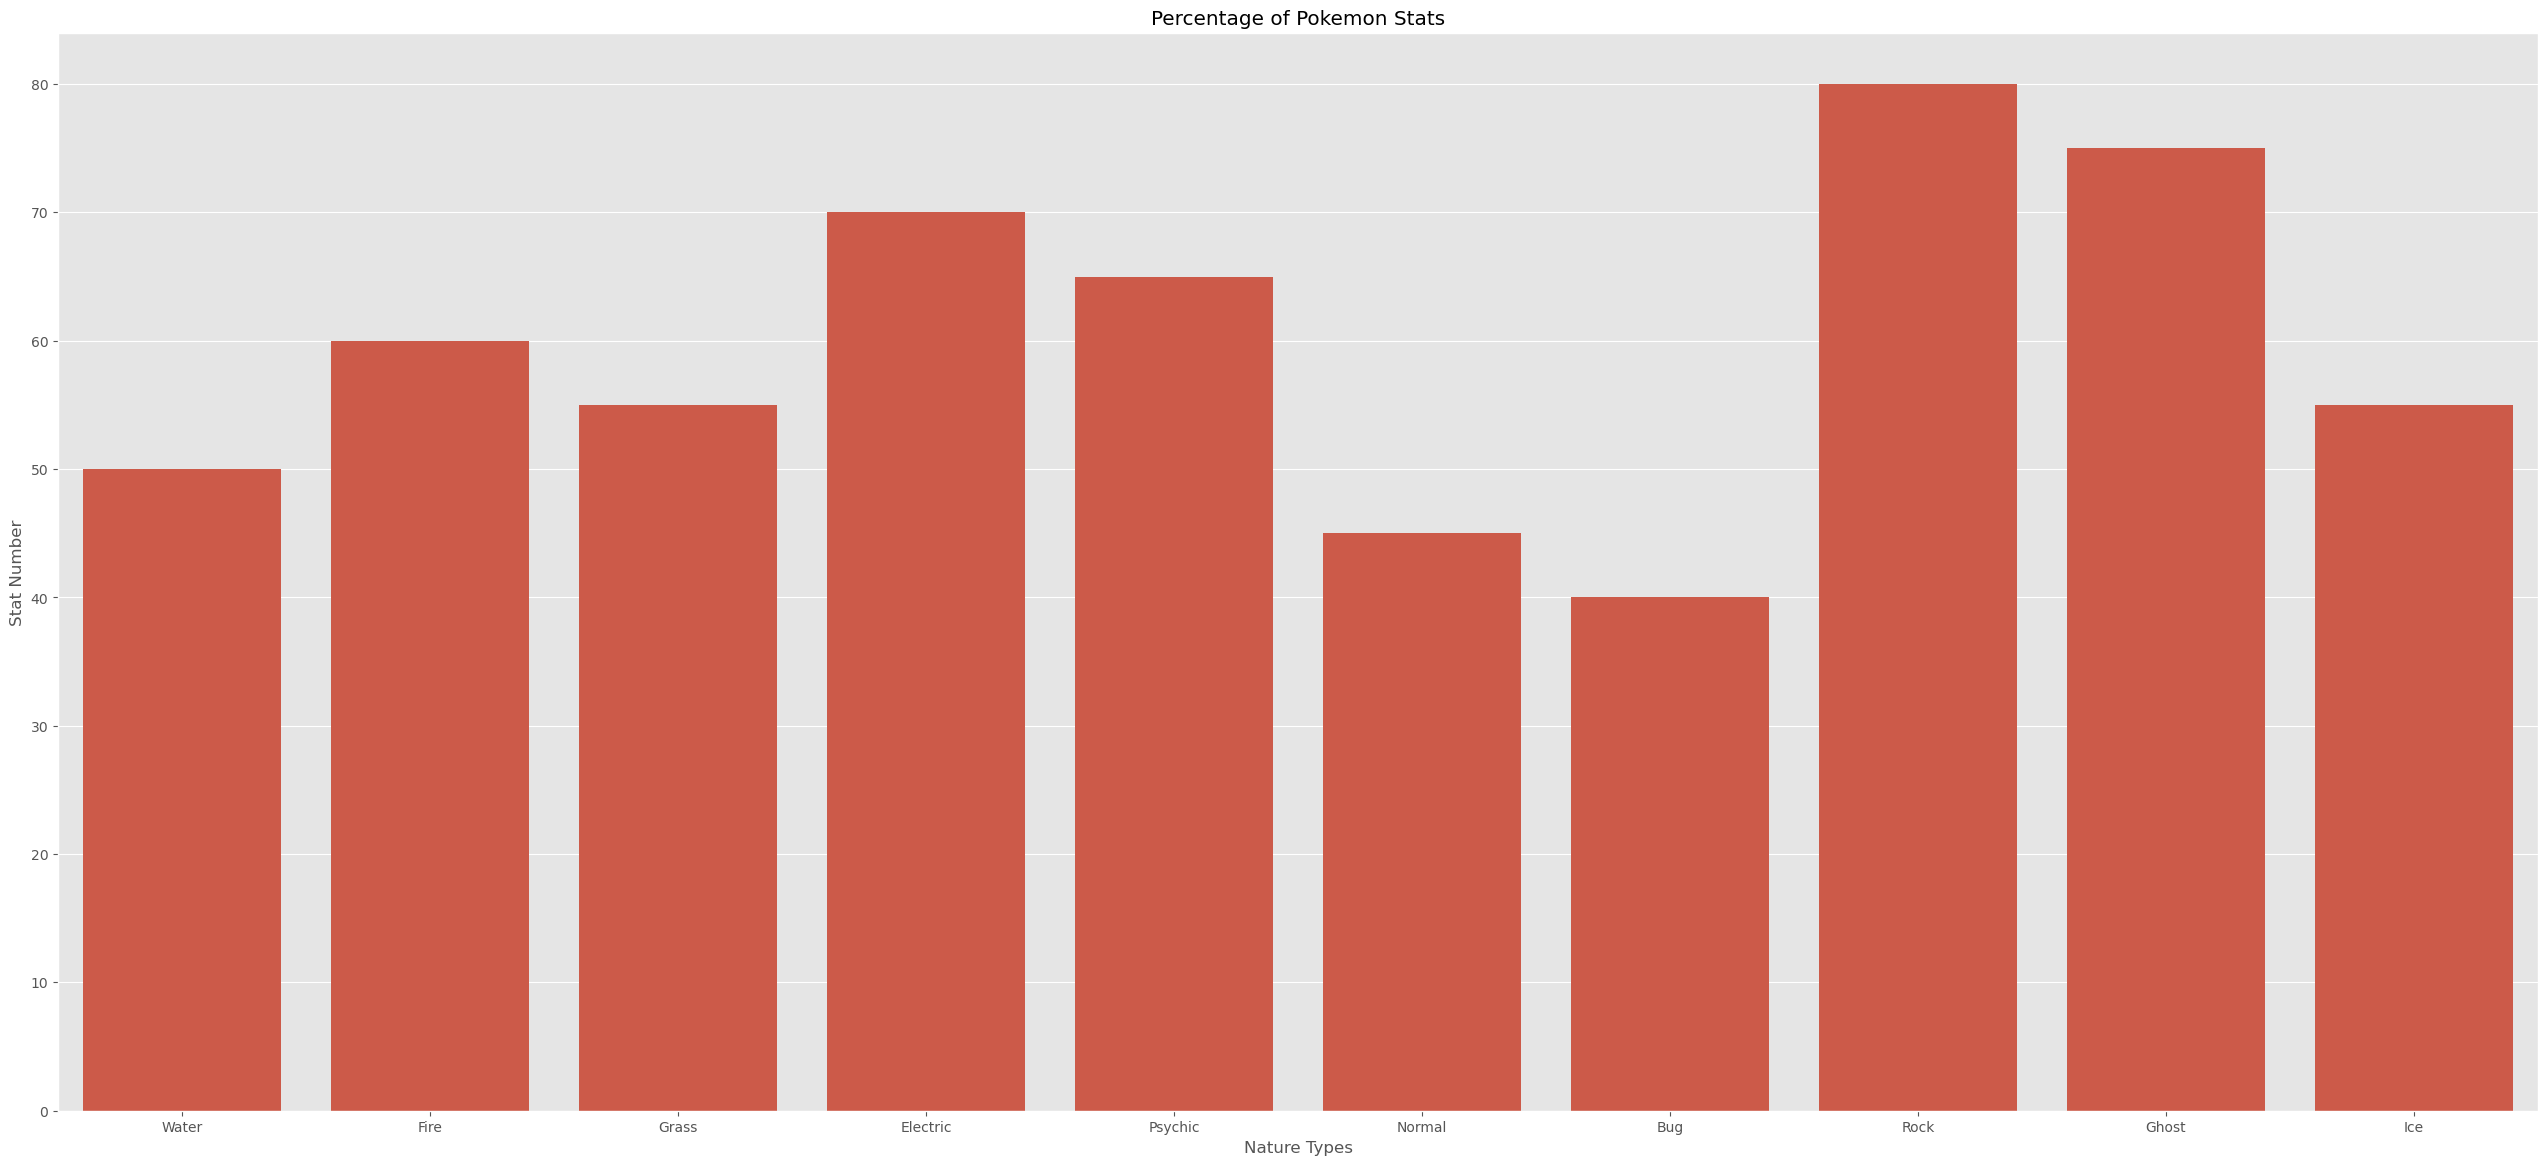

In [447]:
data = {
    'Type 1': ['Water', 'Fire', 'Grass', 'Electric', 'Psychic', 'Normal', 'Bug', 'Rock', 'Ghost', 'Ice'],
    'Base Stats': [50, 60, 55, 70, 65, 45, 40, 80, 75, 55]
}
pokedex_data = pd.DataFrame(data)
pokedex_data.set_index('Type 1', inplace=True)
plt.figure(figsize=(32, 14))
plt.title("Percentage of Pokemon Stats")
sns.barplot(x=pokedex_data.index, y=pokedex_data['Base Stats'])
plt.xlabel("Nature Types")
plt.ylabel("Stat Number")
plt.show

In [448]:
data = {
    'Type 1': ['Water', 'Fire', 'Grass', 'Electric', 'Psychic', 'Normal', 'Bug', 'Rock', 'Ghost', 'Ice'],
    'Base Stats': [50, 60, 55, 70, 65, 45, 40, 80, 75, 55]
}
pokedex_data = pd.DataFrame(data)
stats = pokedex_data.groupby('Type 1').agg(['mean', 'median', 'std'])
print(stats)

         Base Stats           
               mean median std
Type 1                        
Bug            40.0   40.0 NaN
Electric       70.0   70.0 NaN
Fire           60.0   60.0 NaN
Ghost          75.0   75.0 NaN
Grass          55.0   55.0 NaN
Ice            55.0   55.0 NaN
Normal         45.0   45.0 NaN
Psychic        65.0   65.0 NaN
Rock           80.0   80.0 NaN
Water          50.0   50.0 NaN


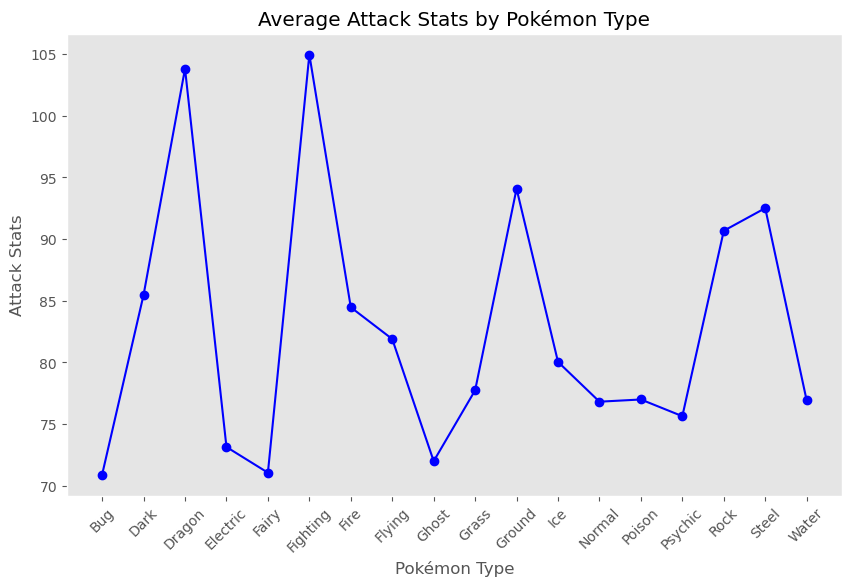

In [474]:
average_stats = pokedex_data.groupby('Type 1')['Attack'].mean().reset_index()
plt.figure(figsize=(10, 6))  
plt.plot(average_stats['Type 1'], average_stats['Attack'], marker='o', color='blue')  # Line plot
plt.title('Average Attack Stats by Pokémon Type')  # Title of the plot
plt.xlabel('Pokémon Type')
plt.ylabel('Attack Stats') 
plt.xticks(rotation=45)  
plt.grid() 
plt.show()

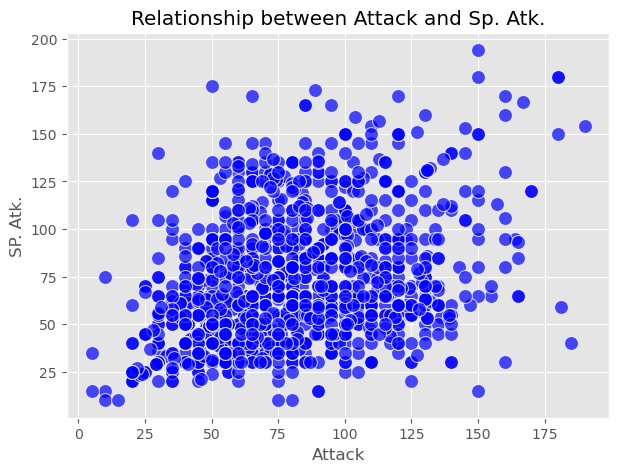

In [526]:
plt.figure(figsize=(7, 5))
plt.title("Relationship between Attack and Sp. Atk.")
sns.scatterplot(data=pokemon, x="Attack", y="SP. Atk.", color="blue", marker="o", s=100, alpha=0.7)
plt.xlabel("Attack")
plt.ylabel("SP. Atk.")
plt.show()

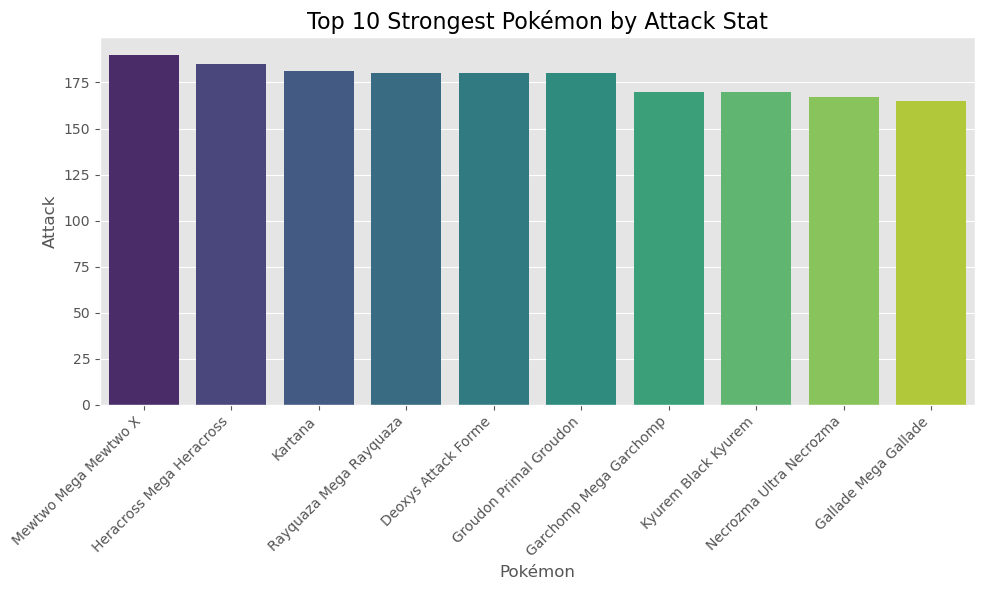

In [476]:
strongest_pokemon = pokedex_data.sort_values(by="Attack", ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x="Name", y="Attack", data=strongest_pokemon, palette="viridis")

plt.title("Top 10 Strongest Pokémon by Attack Stat", fontsize=16)
plt.xlabel("Pokémon", fontsize=12)
plt.ylabel("Attack", fontsize=12)
plt.xticks(rotation=45, ha='right') 

plt.tight_layout()
plt.show()

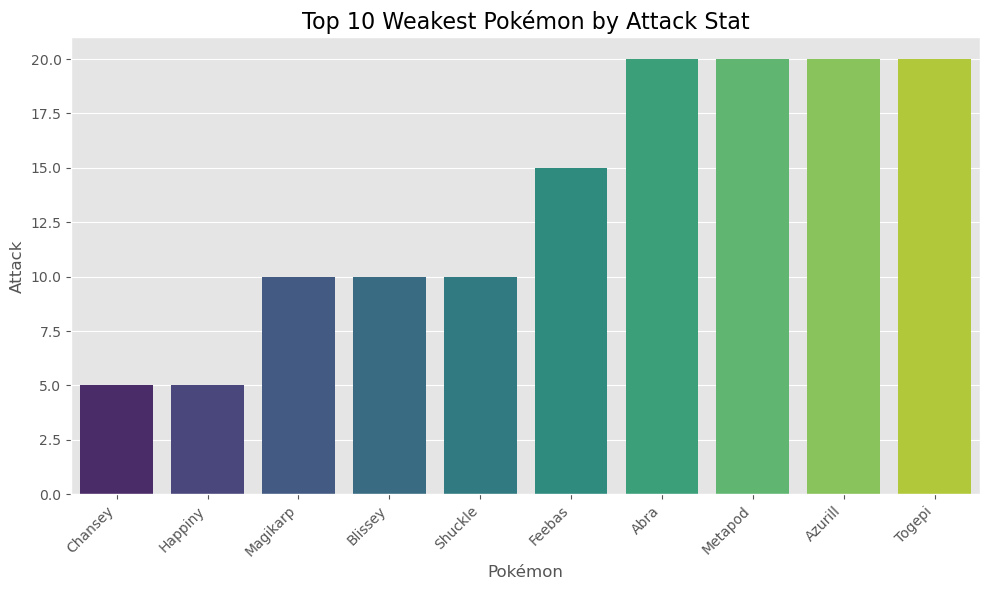

In [478]:
weakest_pokemon = pokedex_data.sort_values(by="Attack", ascending=True).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x="Name", y="Attack", data=weakest_pokemon, palette="viridis")

plt.title("Top 10 Weakest Pokémon by Attack Stat", fontsize=16)
plt.xlabel("Pokémon", fontsize=12)
plt.ylabel("Attack", fontsize=12)
plt.xticks(rotation=45, ha='right')  

plt.tight_layout()
plt.show()

In [494]:
print(pokedex_data.columns)

Index(['Image', 'Index', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack',
       'Defense', 'SP. Atk.', 'SP. Def', 'Speed'],
      dtype='object')


In [522]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd

X = pokedex_data[['HP', 'Attack', 'Defense', 'SP. Atk.', 'SP. Def', 'Speed']] 
y = pokedex_data['Total'] 

print("Shape of X (features):", X.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression() 
model.fit(X_train, y_train)

print("trainX shape: ", X_train.shape)
print("testX shape: ", X_test.shape)


knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_score = knn.score(X_test, y_test)
print(f"KNN Score: {knn_score}")

Shape of X (features): (1215, 6)
trainX shape:  (850, 6)
testX shape:  (365, 6)
KNN Score: 0.14246575342465753
